In [64]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
#sklearn  libraries
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

#Train Test Split
from sklearn.model_selection import train_test_split

#Preprocessing:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#Model Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [66]:
df=pd.read_csv("../data/cleaned_for_modeling.csv",low_memory=False)
df.head()

,id,Tranc_YearMonth,town,block,street_name,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,...,bus_stop_nearest_distance,bus_stop_name,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation
0,88471,2016-05-01,KALLANG/WHAMPOA,3B,UPP BOON KENG RD,90.0,2006,680000.0,2016,5,...,29.427395,Blk 3B,1138.633422,Geylang Methodist School,78,1,1138.633422,Geylang Methodist School,224,0
1,122598,2012-07-01,BISHAN,153,BISHAN ST 13,130.0,1987,665000.0,2012,7,...,58.207761,BLK 151A MKT,415.607357,Kuo Chuan Presbyterian Primary School,45,1,447.894399,Kuo Chuan Presbyterian Secondary School,232,0
2,170897,2013-07-01,BUKIT BATOK,289B,BT BATOK ST 25,144.0,1997,838000.0,2013,7,...,214.747860,Blk 289E,498.849039,Keming Primary School,39,0,180.074558,Yusof Ishak Secondary School,188,0
3,86070,2012-04-01,BISHAN,232,BISHAN ST 22,103.0,1992,550000.0,2012,4,...,43.396521,Opp Bishan Nth Shop Mall,389.515528,Catholic High School,20,1,389.515528,Catholic High School,253,1
4,153632,2017-12-01,YISHUN,876,YISHUN ST 81,83.0,1987,298000.0,2017,12,...,129.422752,Blk 873,401.200584,Naval Base Primary School,74,0,312.025435,Orchid Park Secondary School,208,0


1.1 Train_test_split 

In [67]:
df.drop(columns=['Tranc_YearMonth'], inplace = True)

In [68]:
df.select_dtypes(include='object').columns

Index(['town', 'block', 'street_name', 'full_flat_type', 'address', 'postal',
       'planning_area', 'mrt_name', 'bus_stop_name', 'pri_sch_name',
       'sec_sch_name'],
      dtype='object')

Comments:
To decreas the complexity we can reduce some of the columns which are not relavent for the initial analysis.
There are several columns describing the location of the HDB which would not perform well in the linear analysis.
'block', 'street_name', 'address', 'bus_stop_name'

In [69]:
df.drop(columns=['block', 'street_name','address', 'postal',
       'planning_area', 'mrt_name', 'bus_stop_name', 'pri_sch_name',
       'sec_sch_name'], inplace = True)

In [70]:
df.shape

(150634, 48)

In [71]:
y = df['resale_price']
X = df.drop(columns = ['resale_price'])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
X_train.shape

(112975, 47)

In [74]:
X_train.head().reset_index()
X_train.head()

,id,town,floor_area_sqm,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,full_flat_type,hdb_age,max_floor_lvl,...,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
119232,141091,CENTRAL AREA,105.0,2002,2018,5,14,5 ROOM Improved,19,19,...,428.116622,0,1,77.613934,482.248922,57,0,1524.987856,260,1
77519,80265,GEYLANG,104.0,1985,2016,10,2,4 ROOM Model A,36,12,...,583.486739,0,0,84.243922,256.134712,43,1,215.199223,188,0
102223,111472,CHOA CHU KANG,122.0,1989,2021,4,11,5 ROOM Improved,32,12,...,611.625473,1,1,175.626599,160.722925,38,0,693.123603,211,0
120077,103915,SERANGOON,105.0,1989,2017,1,2,4 ROOM Model A,32,13,...,507.997575,1,1,150.573948,616.196146,44,0,284.855656,222,0
119742,149174,BUKIT BATOK,84.0,1986,2021,4,5,4 ROOM Simplified,35,9,...,551.835650,1,0,140.053213,165.758008,68,0,82.717674,205,0


**Categorical Data - Encoding**

In [75]:
X_train_obj = X_train.select_dtypes(include='object')
X_test_obj = X_test.select_dtypes(include='object')

X_train_obj.reset_index(inplace=True,drop=True)
X_test_obj.reset_index(inplace=True,drop=True)

enc = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')
X_train_enc = enc.fit_transform(X_train_obj)
X_test_enc = enc.transform(X_test_obj)

In [76]:
output_col_names = list(enc.get_feature_names_out())
X_train_enc_df = pd.DataFrame(X_train_enc.toarray(), columns = output_col_names)
X_test_enc_df = pd.DataFrame(X_test_enc.toarray(), columns = output_col_names)


In [77]:
print(X_train_enc_df.shape)
print(X_test_enc_df.shape)

(112975, 67)
(37659, 67)


**Numerical Data - Scaling**

In [78]:
X_train_numeric = X_train.select_dtypes(exclude='object')
X_test_numeric = X_test.select_dtypes(exclude='object')


In [79]:
print(X_train_numeric.shape)
print(X_test_numeric.shape)

(112975, 45)
(37659, 45)


In [80]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train_numeric)
X_test_ss = ss.transform(X_test_numeric)

In [81]:
output_col_names = list(ss.get_feature_names_out())
X_train_ss_df = pd.DataFrame(X_train_ss, columns = output_col_names)
X_test_ss_df = pd.DataFrame(X_test_ss, columns = output_col_names)

In [82]:
print(X_train_ss_df.shape)
print(X_test_ss_df.shape)

(112975, 45)
(37659, 45)


In [83]:
X_train_ss_df.head()

,id,floor_area_sqm,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,hdb_age,max_floor_lvl,commercial,market_hawker,...,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
0,0.893609,0.315498,0.786641,0.547976,-0.473321,1.033703,-0.786641,0.618328,2.061378,-0.009868,...,-0.782721,-1.096076,1.670318,-0.678475,0.368935,0.091917,-0.357112,3.285180,2.488833,5.511982
1,-0.239349,0.274537,-0.615564,-0.178507,1.021654,-1.136708,0.615564,-0.503510,-0.485112,-0.009868,...,-0.420708,-1.096076,-0.598688,-0.559372,-0.591934,-0.690164,2.800244,-0.949260,-1.106627,-0.181423
2,0.341919,1.011823,-0.285633,1.637699,-0.772316,0.491100,0.285633,-0.503510,-0.485112,-0.009868,...,-0.355144,0.912345,1.670318,1.082249,-0.997386,-0.969478,-0.357112,0.595831,0.041923,-0.181423
3,0.201161,0.315498,-0.285633,0.184735,-1.669301,-1.136708,0.285633,-0.343248,-0.485112,-0.009868,...,-0.596598,0.912345,1.670318,0.632197,0.938142,-0.634301,-0.357112,-0.724066,0.591229,-0.181423
4,1.044164,-0.544669,-0.533081,1.637699,-0.772316,-0.594105,0.533081,-0.984298,-0.485112,-0.009868,...,-0.494455,0.912345,-0.598688,0.443200,-0.975989,0.706408,-0.357112,-1.377562,-0.257699,-0.181423


In [84]:
X_train = pd.concat(objs = [X_train_enc_df, X_train_ss_df], axis = 1)
X_train.shape

X_test = pd.concat(objs = [X_test_enc_df, X_test_ss_df], axis = 1)
X_test.shape

(37659, 112)

## Modeling ##

### Linear Regression

In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Model performance

In [86]:
#R2 score
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.891626294165995
0.8916086039715208


In [87]:
#Cross validation score:
cross_val_score(lr, X_train, y_train).mean()

-5.035885855401213e+17

In [88]:
#RMSE train score
y_train_pred = lr.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

47237.19568535129

In [89]:
#RMSE test score
y_test_pred = lr.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

46996.45864962206

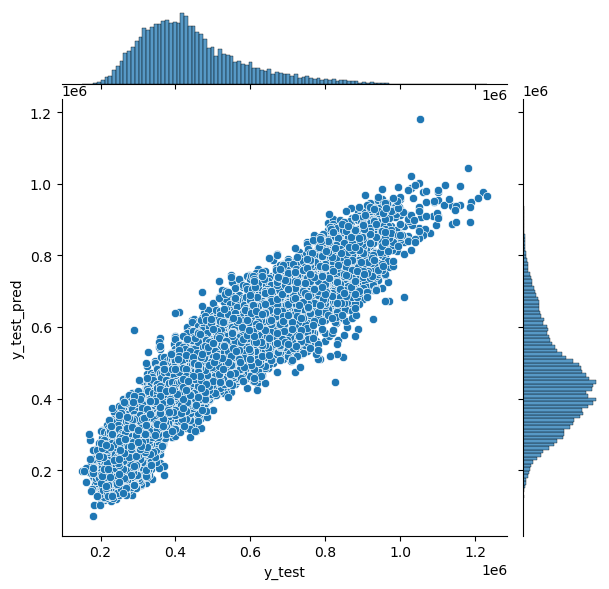

In [131]:
#to check the model performance. Predicated price (y-axis) vs test (x-axis) values
jp =sns.jointplot(x=y_test, y= y_test_pred)
jp.set_axis_labels('y_test', 'y_test_pred')

plt.savefig('../data/output/images/predicted_vs_test.png')
plt.show()

Comments:
    

## RidgeCV

In [126]:
%%time
# Define the alpha values to be parameterize
alphas = [0.1, 1, 10]

# Define the model/estimator-  here we leave it to default
RidgeCV = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)

# Fit the model
RidgeCV.fit(X_train,y_train)

CPU times: total: 6.61 s
Wall time: 3.07 s


RidgeCV(alphas=[0.1, 1, 10], cv=5, scoring='neg_mean_squared_error')

In [127]:
best_alpha = RidgeCV.alpha_
best_alpha

0.1

#### Model performance

In [93]:
#R2 score
print(RidgeCV.score(X_train, y_train))
print(RidgeCV.score(X_test, y_test))

0.891626176590408
0.8916091810087101


In [94]:
#Cross validation score:
Ridge = Ridge(alpha = best_alpha)
cross_val_score(Ridge, X_train, y_train).mean()

0.8913212642581311

In [95]:
#RMSE train score using RidgeCV
y_train_pred = RidgeCV.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

47237.22130936898

In [96]:
#RMSE test score using RidgeCV
y_test_pred = RidgeCV.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

46996.333553251425

## LASSOCV MODELLING

In [112]:
%%time
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(X_train, y_train)
print (optimal_lasso.alpha_)
# Lasso = LassoCV(max_iter=10000)
# Lasso.fit(X_train, y_train)

93.70168342510757
CPU times: total: 24.3 s
Wall time: 19 s


### model performance

In [113]:
print(optimal_lasso.score(X_train, y_train))
print(optimal_lasso.score(X_test, y_test))

0.8861298416528276
0.8855905720799889


In [121]:
#Cross validation score:
lasso = Lasso(alpha = optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5).mean()
print (lasso_scores)

0.8858301913744462


In [116]:
#RMSE train score
y_train_pred = optimal_lasso.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

48420.25889712786

In [117]:
#RMSE test score
y_test_pred = optimal_lasso.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

48283.48795856866

In [124]:
LassoCV_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':optimal_lasso.coef_,
                            'abs_coef':np.abs(optimal_lasso.coef_)})

LassoCV_coefs.sort_values('abs_coef', inplace=True, ascending=False)

LassoCV_coefs.head(20)

,variable,coef,abs_coef
14,town_MARINE PARADE,212527.103445,212527.103445
38,full_flat_type_3 ROOM Terrace,186194.684030,186194.684030
5,town_BUKIT TIMAH,155297.286438,155297.286438
68,floor_area_sqm,100666.773591,100666.773591
52,full_flat_type_5 ROOM DBSS,97029.915710,97029.915710
23,town_WOODLANDS,-83864.199297,83864.199297
18,town_SEMBAWANG,-83775.048548,83775.048548
1,town_BISHAN,83299.113359,83299.113359
20,town_SERANGOON,64087.521160,64087.521160
17,town_QUEENSTOWN,62543.422789,62543.422789


In [128]:
ridge_resid = y_train - RidgeCV.predict(X_train)
lasso_resid = y_train - optimal_lasso.predict(X_train)

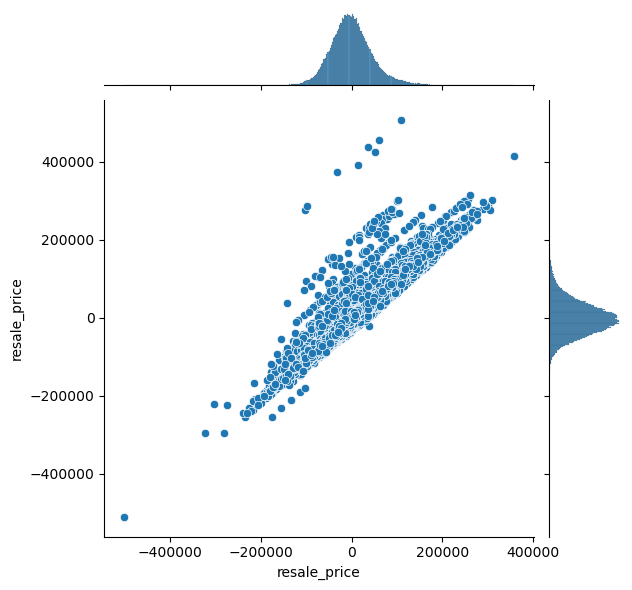

In [129]:
sns.jointplot(x=ridge_resid, y=lasso_resid)

- from the top contributing features, our modelling captures the location based parameters. Also, certain hdb is located only in a few locations. Therefore, they are also strongly correlated. It is interesting to note that town_sembawang has a negative correlation with price.

- One of the other features which is captured:
    - floor_area_sqm 
    - lease_commence_date
    - Hawker_Within_2km

## Model summary

|Model|Cross validation score|R2 score|RMSE score|
|:----|:----|:----|:----|
|Linear_Regression|-5.04E+17|train: 0.8916|train: 47237|
| | |test: 0.8916|test:46996|
|Ridge_Regression|0.8913|train: 0.8916|train: 47237|
| | |test: 0.8916|test: 46996|
|Lasso_Regression|0.8858|train: 0.8916|train: 48420|
| | |test: 0.8915|test: 48283|



- Based on the model matrics, we choose, linear_regression as our best model
- The reasons for linear regression outperforming the other models would be:
    due to the clean data. We have already cleaned and orgainized the data by categories
